In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set_style('white')
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
from matplotlib import cm

In [2]:
data = pd.read_csv(r'Olympics\athlete_events.csv')
regions = pd.read_csv(r"Olympics\noc_regions.csv")

In [3]:
data = data.merge(regions[["NOC","region"]],left_on="NOC",right_on="NOC",how = "left")

In [4]:
def age_group(x):
    if x <= 18:
        return '<18'
    elif x <= 30:
        return '19-30'
    elif x <= 45:
        return '31-45'
    else:
        return '>46'

In [5]:
data['Age_Group'] = data['Age'].apply(lambda x: age_group(x))

In [6]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Age_Group
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,19-30
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,19-30
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,19-30
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,31-45
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,19-30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID           271116 non-null int64
Name         271116 non-null object
Sex          271116 non-null object
Age          261642 non-null float64
Height       210945 non-null float64
Weight       208241 non-null float64
Team         271116 non-null object
NOC          271116 non-null object
Games        271116 non-null object
Year         271116 non-null int64
Season       271116 non-null object
City         271116 non-null object
Sport        271116 non-null object
Event        271116 non-null object
Medal        39783 non-null object
region       270746 non-null object
Age_Group    271116 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [8]:
data.isnull().count()

ID           271116
Name         271116
Sex          271116
Age          271116
Height       271116
Weight       271116
Team         271116
NOC          271116
Games        271116
Year         271116
Season       271116
City         271116
Sport        271116
Event        271116
Medal        271116
region       271116
Age_Group    271116
dtype: int64

In [9]:
tn = data.isnull().sum().sort_values(ascending=False)
pc = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([tn, pc], axis=1, keys=['total_missing', '%_missing'])
missing.head(5)

,total_missing,%_missing
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
region,370,0.136473


In [10]:
# There are some missing values in columns : Age, Height, Weight, Medal

In [11]:
athletes_all = data.groupby('Year')['ID'].nunique().reset_index()
athletes = data.groupby(['Year','Season'])['ID'].nunique().reset_index()

In [12]:
athletes.head(3)

,Year,Season,ID
0,1896,Summer,176
1,1900,Summer,1224
2,1904,Summer,650


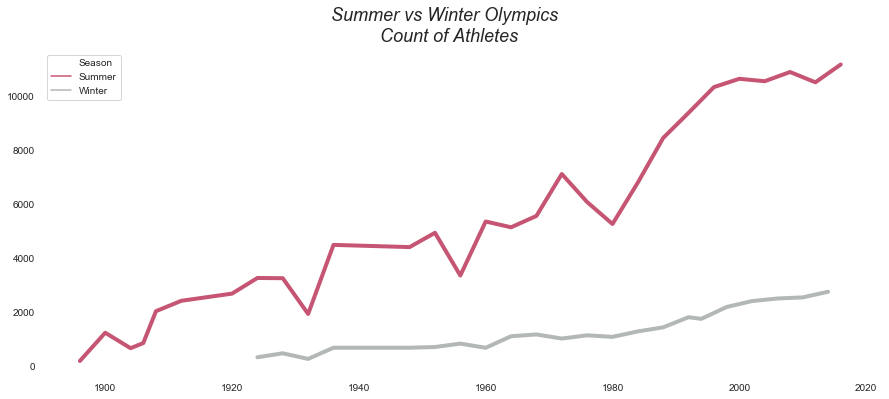

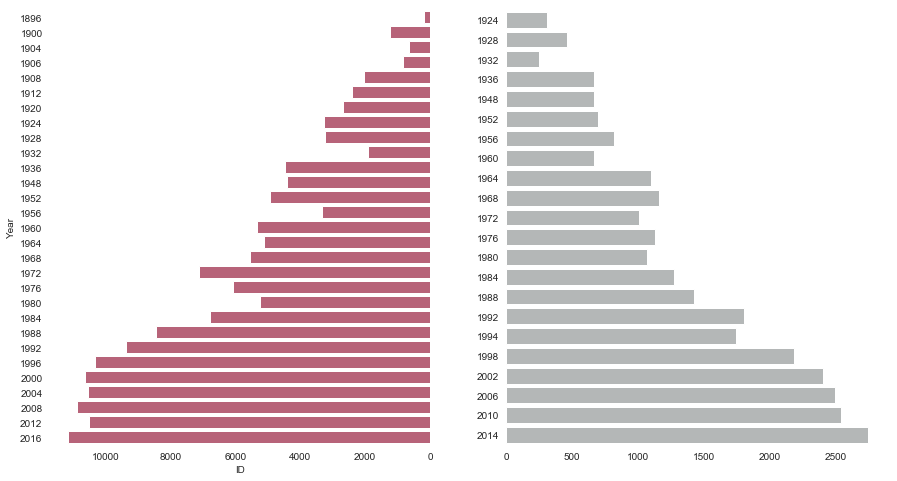

In [13]:
plt.figure(figsize=(15,6))
plt.suptitle('Summer vs Winter Olympics \n Count of Athletes',fontsize=18,style='italic' );
sns.lineplot(x='Year',y='ID',data=athletes,palette=['#c55572','#b3b7b8'],linewidth=4,hue='Season')
plt.xlabel('');
plt.ylabel('');
sns.despine(left=True, bottom=True)
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax1 = sns.barplot(y='Year',x='ID',data=athletes[athletes['Season']=='Summer'],ax=ax[0],palette=['#c55572'],orient='h')
#ax1.invert_yaxis()  # labels read top-to-bottom
ax1.invert_xaxis()  # labels read top-to-bottom
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(y='Year',x='ID',data=athletes[athletes['Season']=='Winter'],ax=ax[1],palette=['#b3b7b8'],orient='h')
#ax2.invert_yaxis()  # labels read top-to-bottom
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [14]:
smin,smax,wmin,wmax = athletes[athletes['Season']=='Summer']['ID'].min(), athletes[athletes['Season']=='Summer']['ID'].max(), athletes[athletes['Season']=='Winter']['ID'].min(), athletes[athletes['Season']=='Winter']['ID'].max()
print(f"First Summer Olympics (1896) : {smin} unique participants\nLast Summer Olympics (2016) :{smax} praticipants\nFirst Winter Olympics(1924): {wmin} unique participants\nLast Winter Olympics (2014) there were {wmax} praticipants")

First Summer Olympics (1896) : 176 unique participants
Last Summer Olympics (2016) :11179 praticipants
First Winter Olympics(1924): 252 unique participants
Last Winter Olympics (2014) there were 2745 praticipants


In [15]:
athletes_sex_summer = data[data['Season']=='Summer'].groupby(['Year','Sex'])['ID'].nunique().reset_index()
athletes_sex_winter = data[data['Season']=='Winter'].groupby(['Year','Sex'])['ID'].nunique().reset_index()

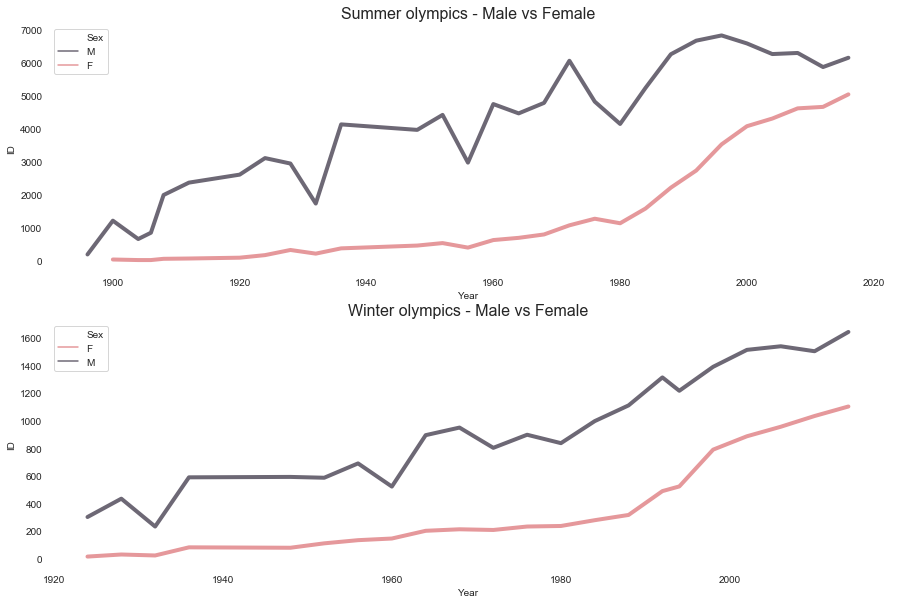

In [16]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax1 = sns.lineplot(x='Year',y='ID',data=athletes_sex_summer,ax=ax[0],palette=['#6D6875','#E5989B'],hue='Sex',linewidth=4)
ax1.set_title('Summer olympics - Male vs Female',fontsize=16)
ax2 = sns.lineplot(x='Year',y='ID',data=athletes_sex_winter,ax=ax[1],palette=['#E5989B','#6D6875'],hue='Sex',linewidth=4)
ax2.set_title('Winter olympics - Male vs Female',fontsize=16)
sns.despine(left=True, bottom=True)

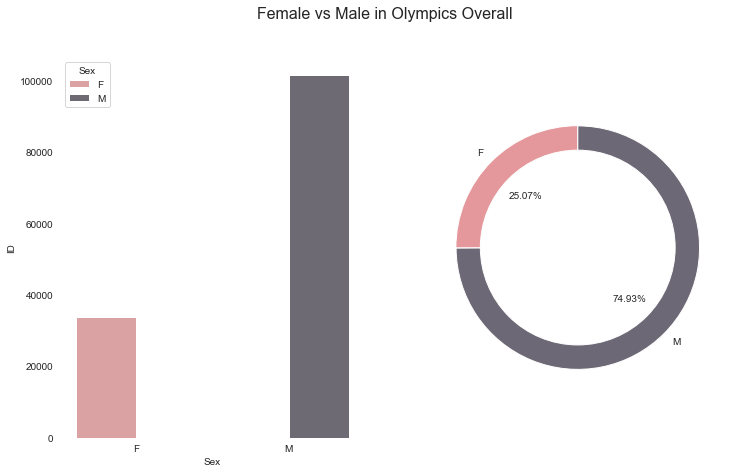

<Figure size 432x288 with 0 Axes>

In [17]:
f, ax = plt.subplots(1,2,figsize=(12,7));
sns.barplot(x=data.groupby(['Sex'])['ID'].nunique().reset_index()['Sex'], y='ID',data=data.groupby(['Sex'])['ID'].nunique().reset_index(),palette=['#E5989B','#6D6875'],ax=ax[0],hue='Sex')
sns.despine(left=True, bottom=True);
my_circle=plt.Circle( (0,0), 0.8, color='white');
names=data.groupby(['Sex'])['ID'].nunique().index.tolist();
size=data.groupby(['Sex'])['ID'].nunique().values.tolist();
plt.pie(size, labels=names, colors=['#E5989B','#6D6875'],autopct='%1.2f%%',explode = (0.001,0.001),startangle=90);
p=plt.gcf();
p.gca().add_artist(my_circle);
f.suptitle("Female vs Male in Olympics Overall", fontsize=16);
plt.show();
sns.despine(left=True, bottom=True);

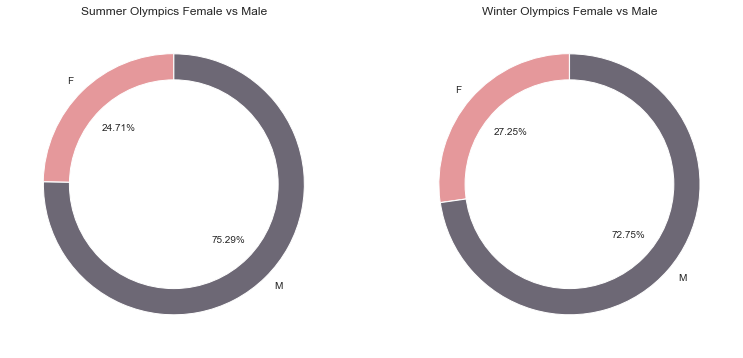

In [18]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data[data['Season']=='Summer'].groupby(['Sex'])['ID'].nunique().plot.pie(autopct='%1.2f%%',
                                                                         explode = (0.001,0.001),startangle=90,
                                                                         colors=['#E5989B','#6D6875']) 
plt.ylabel("")
circ = plt.Circle((0,0),.8,color = "white")
plt.gca().add_artist(circ)
plt.title("Summer Olympics Female vs Male")

plt.subplot(122)
data[data['Season']=='Winter'].groupby(['Sex'])['ID'].nunique().plot.pie(autopct='%1.2f%%',
                                                                         explode = (0.001,0.001),startangle=90,
                                                                         colors=['#E5989B','#6D6875'])
plt.ylabel("")
circ = plt.Circle((0,0),.8,color = "white")
plt.gca().add_artist(circ)
plt.title("Winter Olympics Female vs Male")

plt.show()

In [19]:
# We can see that there is more female participates in Winter Olympics then in Summer. Ratio is bigger in Winter.

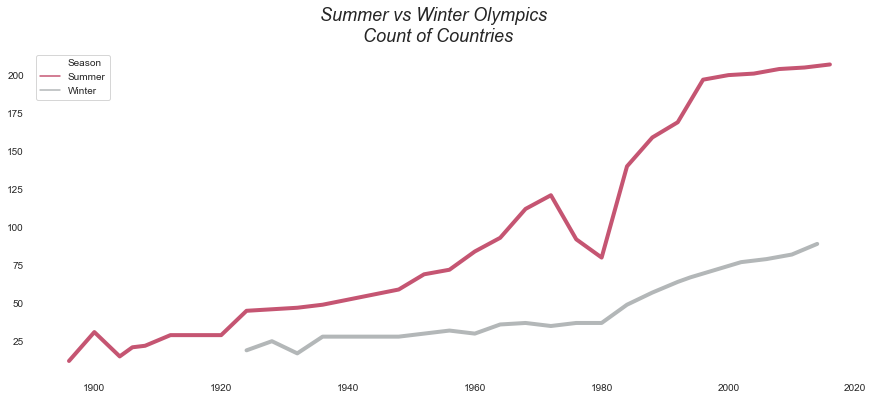

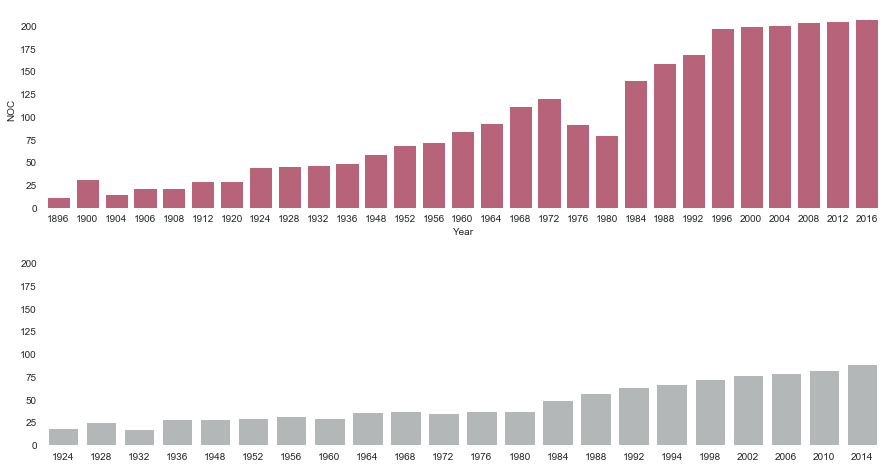

In [20]:
cntr = data.groupby(['Year','Season'])['NOC'].nunique().reset_index()
plt.figure(figsize=(15,6))
plt.suptitle('Summer vs Winter Olympics \n Count of Countries',fontsize=18,style='italic' );
sns.lineplot(x='Year',y='NOC',data=cntr,palette=['#c55572','#b3b7b8'],linewidth=4,hue='Season')
plt.xlabel('');
plt.ylabel('');
sns.despine(left=True, bottom=True)
fig, ax = plt.subplots(2,1,figsize=(15,8),sharey=True)
ax1 = sns.barplot(x='Year',y='NOC',data=cntr[cntr['Season']=='Summer'],ax=ax[0],palette=['#c55572'],orient='v')
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(x='Year',y='NOC',data=cntr[cntr['Season']=='Winter'],ax=ax[1],palette=['#b3b7b8'],orient='v')
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [21]:
summer_cntr = data[data['Season']=='Summer'].groupby(['region'])['Year'].nunique().reset_index().sort_values(by='Year',ascending=False)
winter_cntr = data[data['Season']=='Winter'].groupby(['region'])['Year'].nunique().reset_index().sort_values(by='Year',ascending=False)

In [22]:
summer_cntr.head(5)

,region,Year
87,Italy,29
177,Switzerland,29
63,France,29
190,UK,29
10,Australia,29


In [23]:
winter_cntr.head(5)

,region,Year
93,Switzerland,22
34,France,22
103,USA,22
17,Canada,22
92,Sweden,22


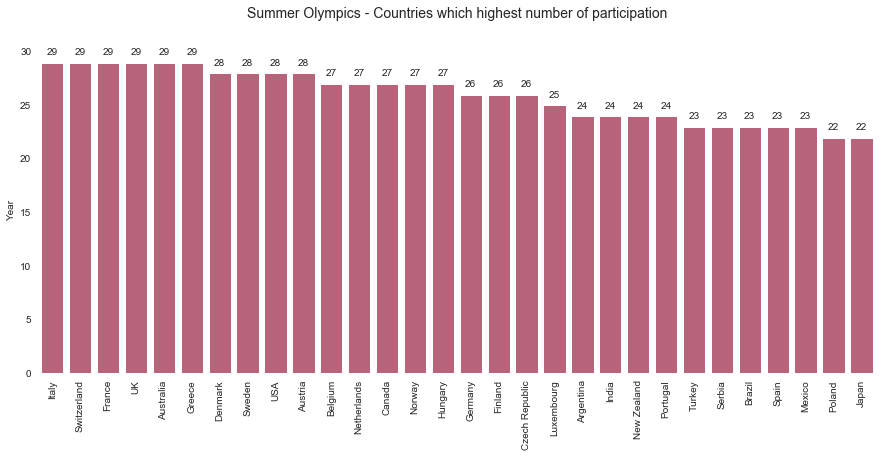

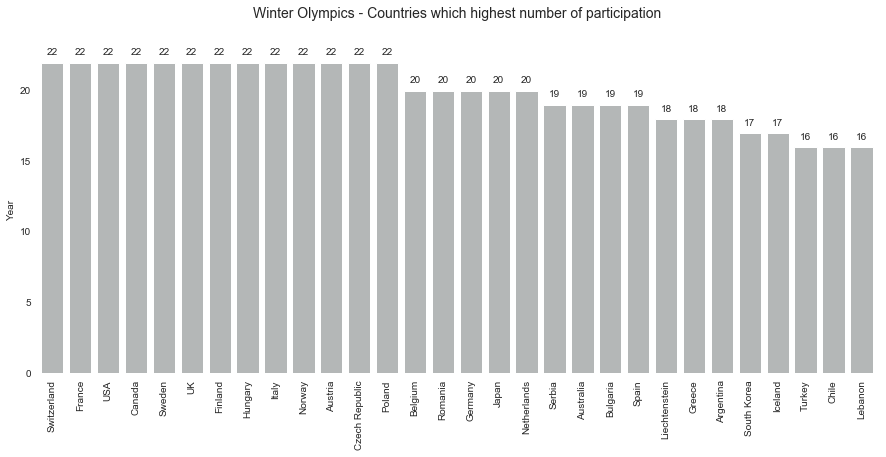

In [24]:
plt.figure(figsize=(15,6))
ax1 = sns.barplot(x='region',y='Year',data=summer_cntr.head(30),palette=['#c55572'],orient='v')
sns.despine(left=True, bottom=True)
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Summer Olympics - Countries which highest number of participation',fontsize=14, y=1.07)
plt.xlabel('');
plt.xticks(rotation=90);
plt.figure(figsize=(15,6))
ax2 = sns.barplot(x='region',y='Year',data=winter_cntr.head(30),palette=['#b3b7b8'],orient='v')
sns.despine(left=True, bottom=True)
plt.title('Winter Olympics - Countries which highest number of participation',fontsize=14,y=1.07)
plt.xlabel('');
plt.xticks(rotation=90);
for p in ax2.patches:
    ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Age Distribution in Olympics

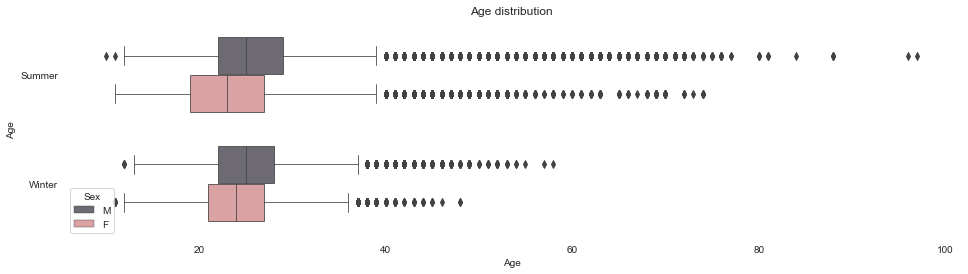

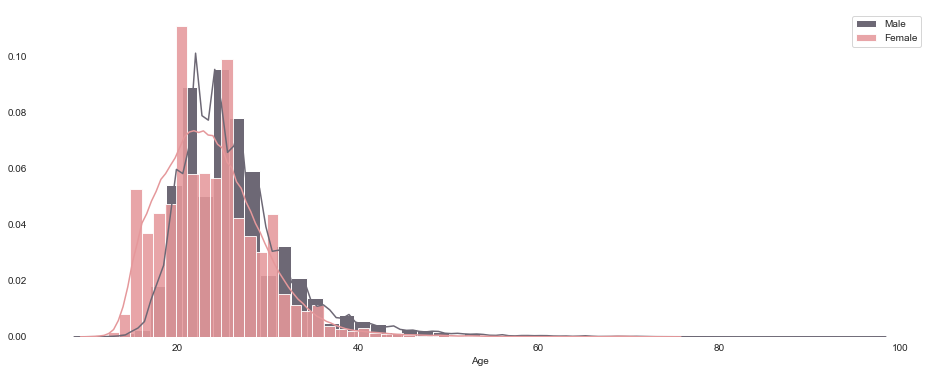

In [25]:
fig, ax = plt.subplots(figsize=(16,4))
a1 = sns.boxplot(y='Season',x="Age",hue='Sex', palette=['#6D6875','#E5989B'],data=data, ax=ax,linewidth=0.8,width=0.7);      
ax.set_ylabel('Age', size=10)
ax.set_title('Age distribution', size=12)
sns.despine(left=True, bottom=True)
plt.show()
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot( data[data['Sex']=='M']["Age"].dropna() , color="#6D6875", label="Male",hist_kws=dict(alpha=1))
sns.distplot( data[data['Sex']=='F']["Age"].dropna() , color="#E5989B", label="Female",hist_kws=dict(alpha=0.87))
plt.legend();
sns.despine(left=True, bottom=True)

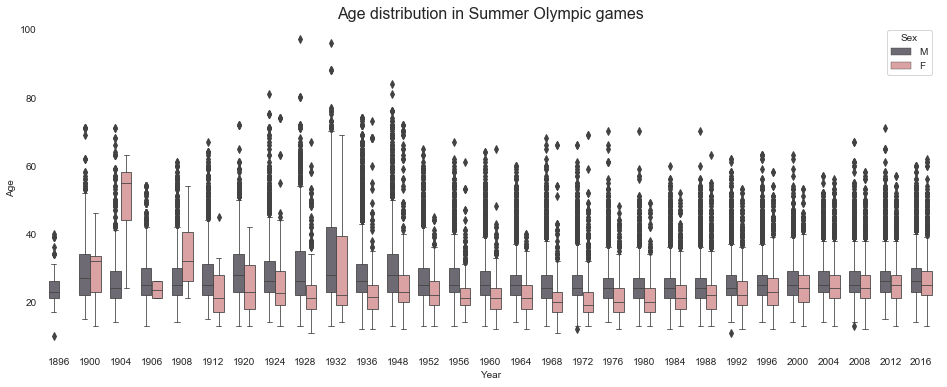

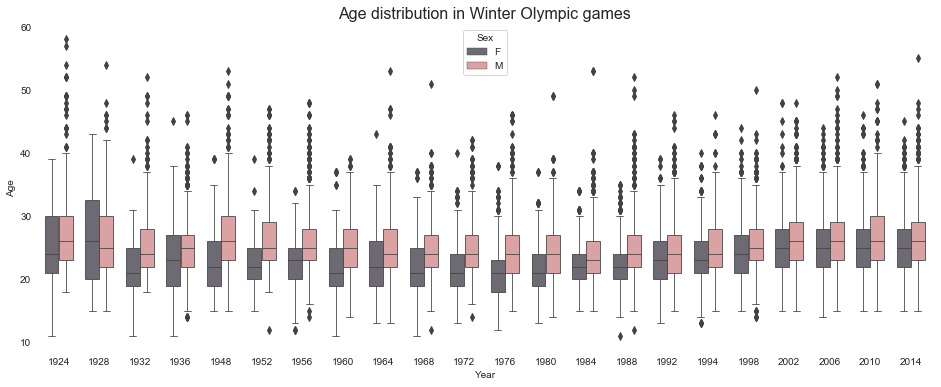

In [26]:
fig, ax = plt.subplots(figsize=(16,6))
a1 = sns.boxplot(x="Year", y="Age", hue="Sex", palette=['#6D6875','#E5989B'],data=data[data['Season']=='Summer'], ax=ax,linewidth=0.8,width=0.7)      
ax.set_ylabel('Age', size=10)
ax.set_title('Age distribution in Summer Olympic games', size=16)
sns.despine(left=True, bottom=True)
plt.show()
fig, ax = plt.subplots(figsize=(16,6))
a1 = sns.boxplot(x="Year", y="Age", hue="Sex", palette=['#6D6875','#E5989B'],data=data[data['Season']=='Winter'], ax=ax,linewidth=0.8,width=0.7)      
ax.set_ylabel('Age', size=10)
ax.set_title('Age distribution in Winter Olympic games', size=16)
sns.despine(left=True, bottom=True)
plt.show()

In [27]:
oldest_male = data[data['Age']==97]
oldest_female = data[(data['Age']==74) & (data['Sex']=='F')].head(1)
data.groupby(['Sex','Season'])['Age'].describe()

count       mean       std   min   25%   50%   75%   max
Sex Season                                                             
F   Summer   59026.0  23.660997  6.043343  11.0  19.0  23.0  27.0  74.0
    Winter   15072.0  24.014398  4.688802  11.0  21.0  24.0  27.0  48.0
M   Summer  154337.0  26.443944  6.778277  10.0  22.0  25.0  29.0  97.0
    Winter   33207.0  25.504261  4.745163  12.0  22.0  25.0  28.0  58.0

* Average Age of Females in Summer Olympics : 23.6 years and in Winter Olympics : 24.01
* Average Age of Males in Summer Olympics : 26.45 years and in Winter Olympics : 25.50
* Max Female Age 74, Min 11 
* Max Male age 97, min 10
* Oldest Male (97 years) Athlete John Quincy Adams Ward from USA, took part in Summer Olympics in 1928
* Oldest Female (74) Ernestine Lonie Ernesta Robert-Mrignac from France, took part in Summer Olympics in 1924

In [28]:
data.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Age_Group
148127,74323,Osamu Mandai,M,22.0,166.0,50.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,NaN,Japan,19-30


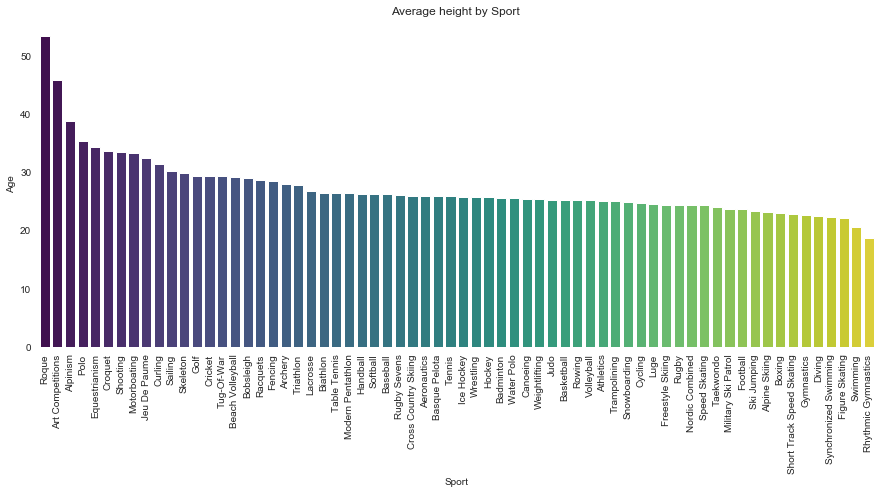

In [29]:
sports_age = data.groupby(['Sport'])['Age'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(y='Age',x='Sport',palette='viridis',data=sports_age.sort_values(by='Age',ascending=False))
plt.xticks(rotation=90);
sns.despine(left=True, bottom=True);
plt.title('Average height by Sport ',fontsize=12,y=1.00);

# Height

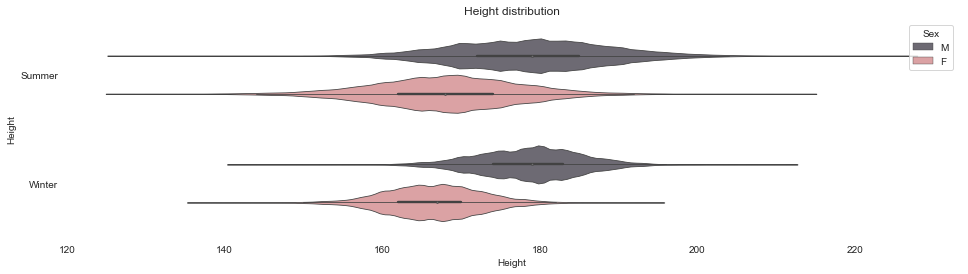

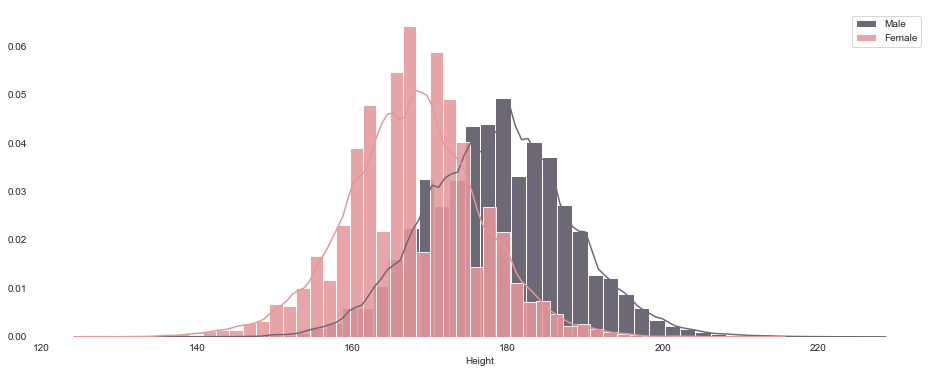

In [30]:
fig, ax = plt.subplots(figsize=(16,4))
a1 = sns.violinplot(y='Season',x="Height",hue='Sex', palette=['#6D6875','#E5989B'],data=data, ax=ax,linewidth=0.8,width=0.7);      
ax.set_ylabel('Height', size=10)
ax.set_title('Height distribution', size=12)
sns.despine(left=True, bottom=True)
plt.show()
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot( data[data['Sex']=='M']["Height"].dropna() , color="#6D6875", label="Male",hist_kws=dict(alpha=1))
sns.distplot( data[data['Sex']=='F']["Height"].dropna() , color="#E5989B", label="Female",hist_kws=dict(alpha=0.87))
plt.legend();
sns.despine(left=True, bottom=True)

In [31]:
summer_h = pd.DataFrame(data[data['Season']=='Summer'].groupby(['Sex','Year'])['Height'].mean()).reset_index()
winter_h = pd.DataFrame(data[data['Season']=='Winter'].groupby(['Sex','Year'])['Height'].mean()).reset_index()

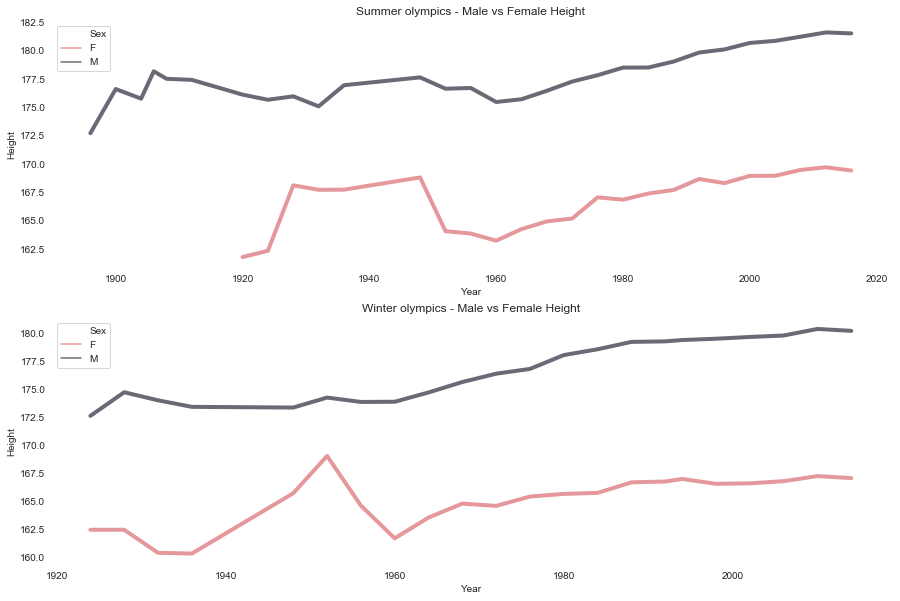

In [32]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax1 = sns.lineplot(x='Year',y='Height',data=summer_h,ax=ax[0],palette=['#E5989B','#6D6875'],hue='Sex',linewidth=4)
ax1.set_title('Summer olympics - Male vs Female Height',fontsize=12)
ax2 = sns.lineplot(x='Year',y='Height',data=winter_h,ax=ax[1],palette=['#E5989B','#6D6875'],hue='Sex',linewidth=4)
ax2.set_title('Winter olympics - Male vs Female Height',fontsize=12)
sns.despine(left=True, bottom=True)

In [33]:
data[data['Sex']=='F']['Height'].describe()

count    67378.000000
mean       167.839740
std          8.778528
min        127.000000
25%        162.000000
50%        168.000000
75%        173.000000
max        213.000000
Name: Height, dtype: float64

In [34]:
data[data['Sex']=='M']['Height'].describe()

count    143567.000000
mean        178.858463
std           9.360318
min         127.000000
25%         172.000000
50%         179.000000
75%         185.000000
max         226.000000
Name: Height, dtype: float64

* Max Height Female 213 cm - Magorzata Teresa "Margo" Dydek 100 kg Basketball
* Max Height Male 226 cm - Yao Ming from China 141 kg Basketball
* Min Height Male 127 cm, # Min Height Female 127 cm

In [35]:
data[(data['Height']==213) & (data['Sex']=='F')].sample(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Age_Group
60623,31045,"Magorzata Teresa ""Margo"" Dydek (-Twigg)",F,26.0,213.0,100.0,Poland,POL,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,NaN,Poland,19-30


In [36]:
data[(data['Height']==226) & (data['Sex']=='M')].sample(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Age_Group
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,19-30


In [37]:
sports_height = data.groupby(['Sport'])['Height'].mean().reset_index()

In [38]:
sports_height.dropna().head()

,Sport,Height
1,Alpine Skiing,173.489052
3,Archery,173.203085
4,Art Competitions,174.644068
5,Athletics,176.256268
6,Badminton,174.178803


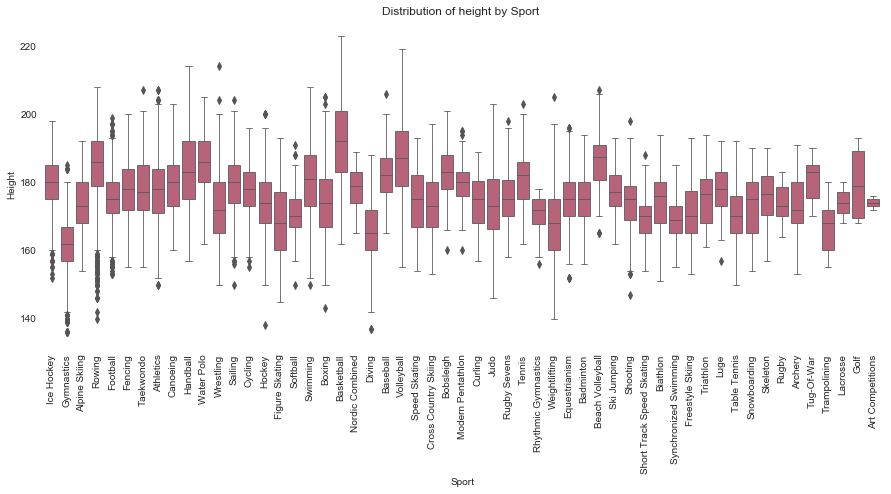

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Sport',y="Height", palette=['#c55572'],data=data.dropna() ,linewidth=0.8,width=0.8)
plt.xticks(rotation=90);
sns.despine(left=True, bottom=True);
plt.title('Distribution of height by Sport ',fontsize=12,y=1.00);

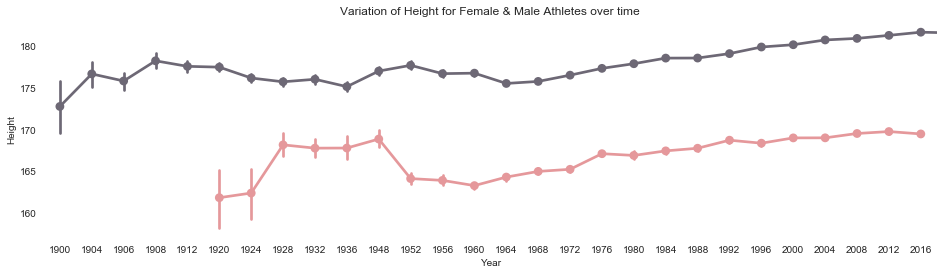

In [40]:
mot,wot = data[(data.Sex == 'M') & (data.Season == 'Summer')], data[(data.Sex == 'F') & (data.Season == 'Summer')]
plt.figure(figsize=(16, 4))
sns.pointplot('Year', 'Height', data=mot,color='#6D6875')
sns.pointplot('Year', 'Height', data=wot,color='#E5989B')
sns.despine(left=True, bottom=True);
plt.title('Variation of Height for Female & Male Athletes over time');

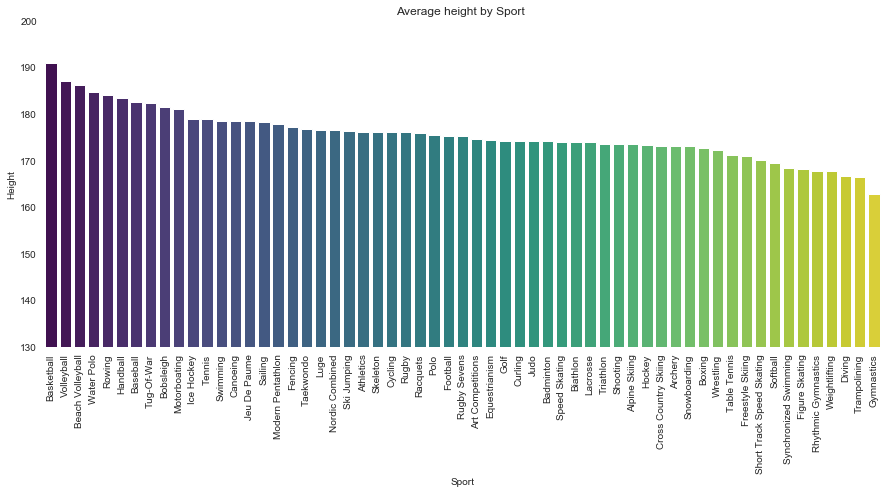

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(y='Height',x='Sport',palette='viridis',data=sports_height.dropna().sort_values(by='Height',ascending=False))
plt.xticks(rotation=90);
plt.ylim(130,200);
sns.despine(left=True, bottom=True);
plt.title('Average height by Sport ',fontsize=12,y=1.00);

# Weight

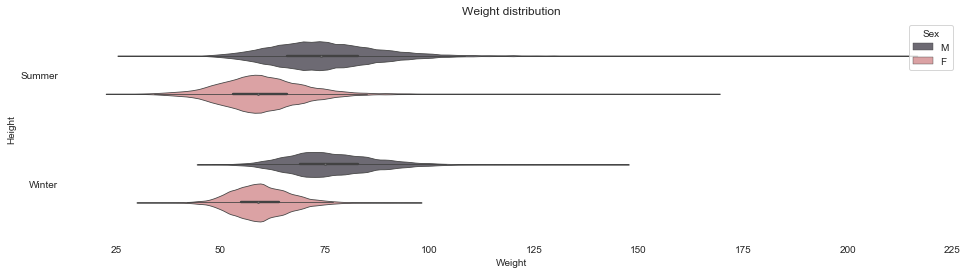

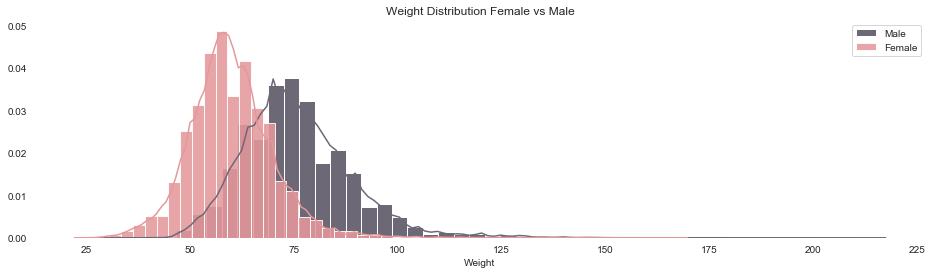

In [42]:
fig, ax = plt.subplots(figsize=(16,4))
a1 = sns.violinplot(y='Season',x="Weight",hue='Sex', palette=['#6D6875','#E5989B'],data=data, ax=ax,linewidth=0.8,width=0.7);      
ax.set_ylabel('Height', size=10)
ax.set_title('Weight distribution', size=12)
sns.despine(left=True, bottom=True)
plt.show()
fig, ax = plt.subplots(figsize=(16,4))
sns.distplot( data[data['Sex']=='M']["Weight"].dropna() , color="#6D6875", label="Male",hist_kws=dict(alpha=1))
sns.distplot( data[data['Sex']=='F']["Weight"].dropna() , color="#E5989B", label="Female",hist_kws=dict(alpha=0.87))
plt.legend();
sns.despine(left=True, bottom=True)
plt.title('Weight Distribution Female vs Male');

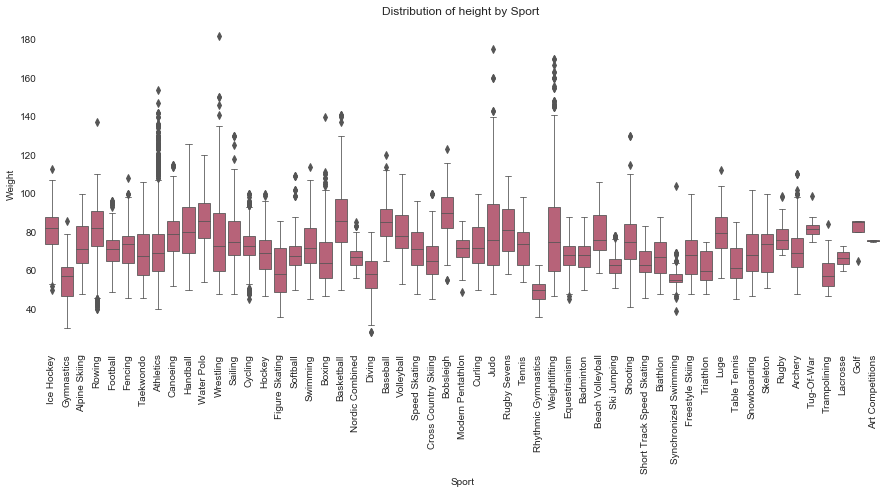

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Sport',y="Weight", palette=['#c55572'],data=data.dropna() ,linewidth=0.8,width=0.8)
plt.xticks(rotation=90);
sns.despine(left=True, bottom=True);
plt.title('Distribution of height by Sport ',fontsize=12,y=1.00);

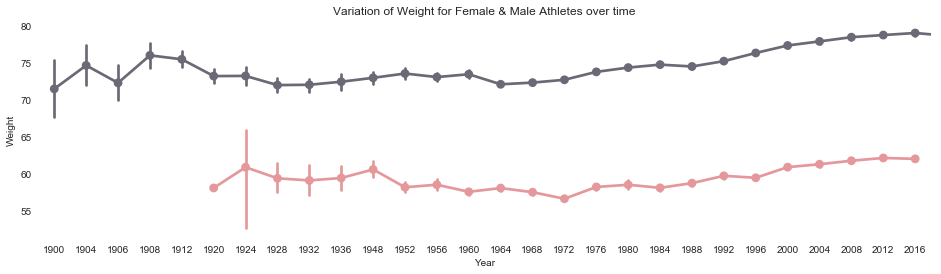

In [44]:
mot,wot = data[(data.Sex == 'M') & (data.Season == 'Summer')], data[(data.Sex == 'F') & (data.Season == 'Summer')]
plt.figure(figsize=(16, 4))
sns.pointplot('Year', 'Weight', data=mot,color='#6D6875')
sns.pointplot('Year', 'Weight', data=wot,color='#E5989B')
sns.despine(left=True, bottom=True);
plt.title('Variation of Weight for Female & Male Athletes over time');

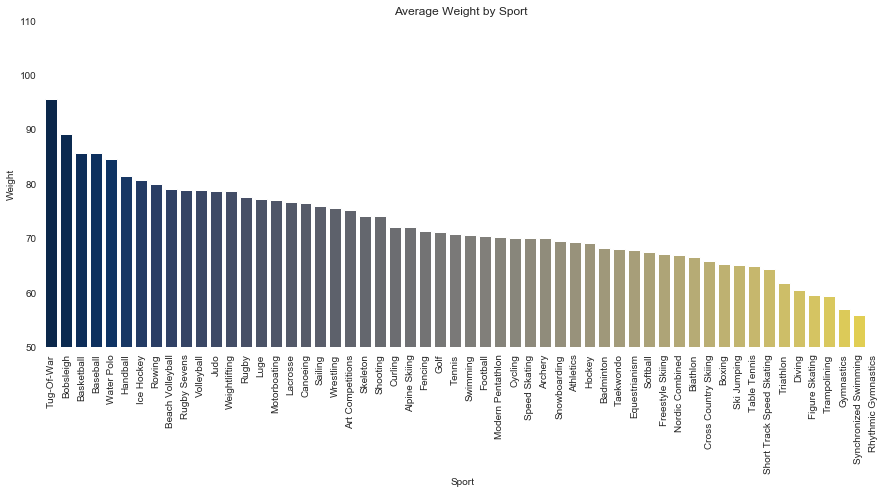

In [45]:
sports_weight = data.groupby(['Sport'])['Weight'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(y='Weight',x='Sport',palette='cividis',data=sports_weight.dropna().sort_values(by='Weight',ascending=False))
plt.xticks(rotation=90);
plt.ylim(50,110);
sns.despine(left=True, bottom=True);
plt.title('Average Weight by Sport ',fontsize=12,y=1.00);

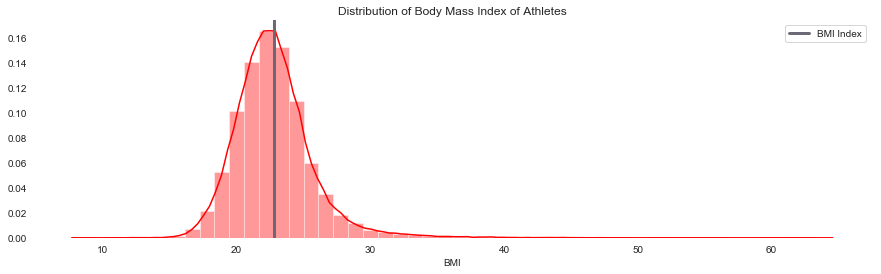

In [84]:
data["BMI"] = data["Weight"]/((data["Height"]/100))**2
plt.figure(figsize=(15,4))
sns.distplot(data["BMI"].dropna(),color = "red")
plt.axvline(data["BMI"].dropna().mean(),
            linewidth = 3,
            color= '#6D6875',label = "BMI Index")
plt.legend(loc = "best")
sns.despine(left=True, bottom=True)
plt.title("Distribution of Body Mass Index of Athletes")
plt.show()

In [46]:
data.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Age_Group
116319,58878,Niels Kerstholt,M,26.0,180.0,76.0,Netherlands,NED,2010 Winter,2010,Winter,Vancouver,Short Track Speed Skating,"Short Track Speed Skating Men's 1,500 metres",NaN,Netherlands,19-30


In [47]:
data[data['Sex']=='F']['Weight'].describe()

count    66771.000000
mean        60.021252
std         10.212250
min         25.000000
25%         54.000000
50%         59.000000
75%         65.000000
max        167.000000
Name: Weight, dtype: float64

In [48]:
data[data['Sex']=='M']['Weight'].describe()

count    141470.000000
mean         75.743677
std          13.211610
min          28.000000
25%          67.000000
50%          74.000000
75%          83.000000
max         214.000000
Name: Weight, dtype: float64

In [49]:
# Max Weight Male 214 kg, Min Weight Male 28 ?
# Max Weight Female 167 kg, Min Weight Male 25 kg ?

# Events

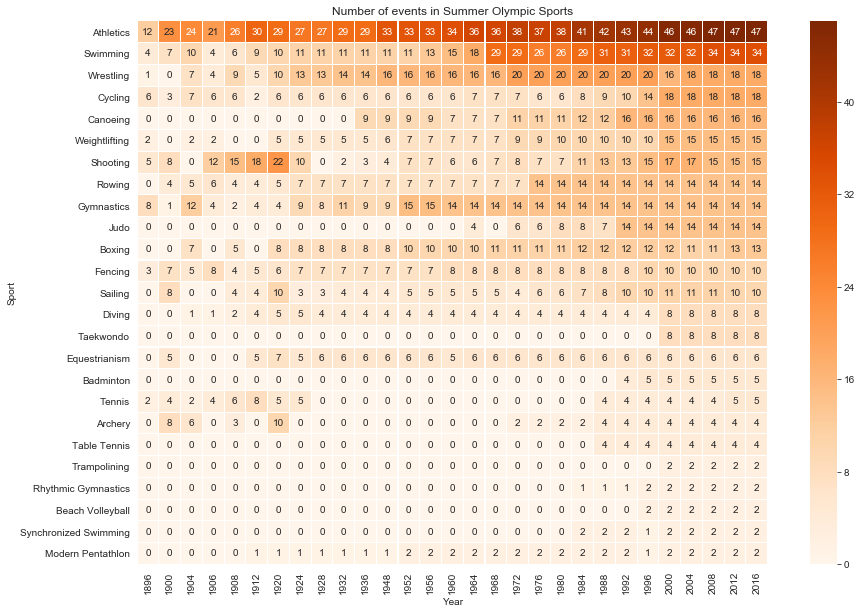

In [50]:
s_year = data[data['Season']=='Summer'].pivot_table(data, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
s_year = s_year.pivot("Sport", "Year", "Event")
s_year.fillna(0,inplace=True)
s_year = s_year.reindex(s_year.sort_values(by=2016, ascending=False).index).head(25)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(s_year, annot=True, linewidths=0.05, ax=ax,cmap='Oranges',square=True)
ax.set_xlabel('Year')
ax.set_ylabel('Sport')
ax.set_title('Number of events in Summer Olympic Sports', size=12)
plt.show()

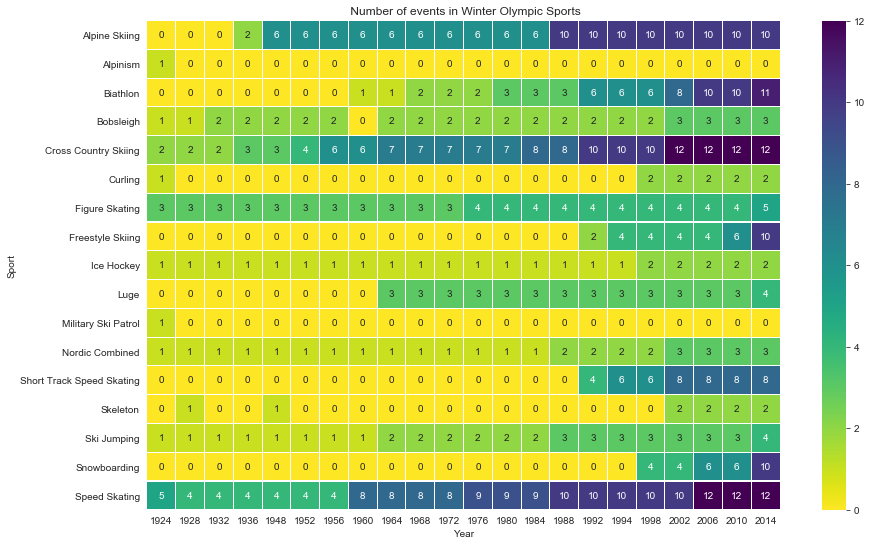

In [51]:
w_year = data[data['Season']=='Winter'].pivot_table(data,index=['Year','Sport'],aggfunc=lambda x: len(x.unique())).reset_index()
w_year = w_year[['Year','Sport','Event']]
w_year = w_year.pivot('Sport','Year','Event')
w_year.fillna(0,inplace=True)
w_year.reindex(w_year.sort_values(by=2014,ascending=False).index)
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(w_year, annot=True, linewidths=0.05, ax=ax,cmap='viridis_r',square=True)
ax.set_xlabel('Year')
ax.set_ylabel('Sport')
ax.set_title(' Number of events in Winter Olympic Sports', size=12)
plt.show()

# Medals

In [52]:
ct_medals = (data[data['Medal']!=0].groupby(['region'])['Medal'].count().reset_index()).sort_values(by='Medal',ascending=False).head(10)
ct_medals.head()

,region,Medal
191,USA,5637
151,Russia,3947
67,Germany,3756
190,UK,2068
63,France,1777


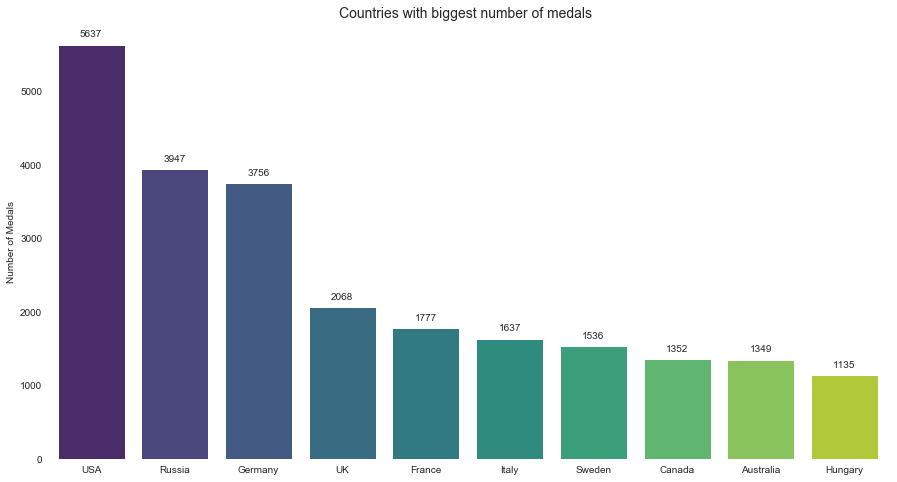

In [53]:
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x='region',y='Medal',data=ct_medals,palette='viridis')
plt.xlabel('');
plt.ylabel('Number of Medals');
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True);
plt.title('Countries with biggest number of medals ',fontsize=14,y=1.00);

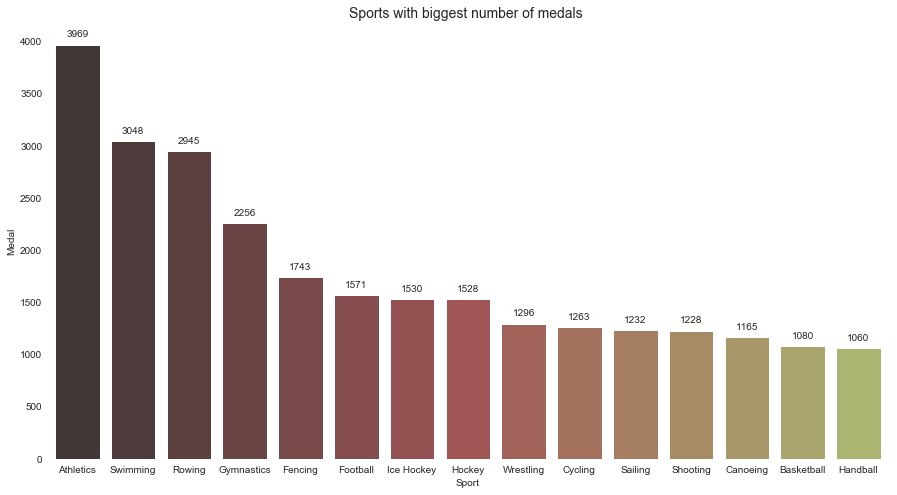

In [54]:
ctr_sport = (data[data['Medal']!=0].groupby(['Sport'])['Medal'].count().reset_index()).sort_values(by='Medal',ascending=False).head(15)
ctr_sport.head(5)
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x='Sport',y='Medal',data=ctr_sport,palette='tab20b_d')
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True);
plt.title('Sports with biggest number of medals ',fontsize=14,y=1.00);

In [55]:
med1 = data.groupby(['Medal','region'])['Name'].count().reset_index().sort_values(by='Medal',ascending=False)
med1 = med1.pivot('region','Medal').reset_index()
med1 = med1.sort_values(by=('Name','Gold'),ascending=False).set_index('region').head(10)

In [56]:
med1.head()

Name                
Medal    Bronze    Gold  Silver
region                         
USA      1358.0  2638.0  1641.0
Russia   1178.0  1599.0  1170.0
Germany  1260.0  1301.0  1195.0
UK        651.0   678.0   739.0
Italy     531.0   575.0   531.0

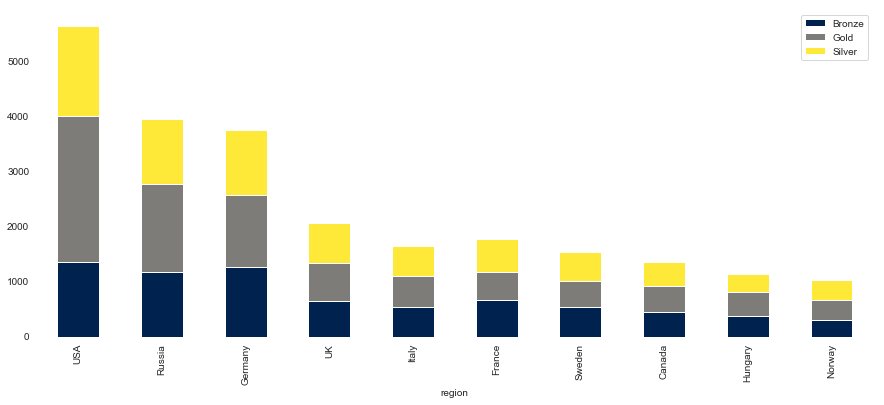

In [57]:
fig, ax = plt.subplots(figsize=(15,6))
med1.plot(kind='bar',stacked=True,colormap='cividis',ax=ax)
ax.legend(["Bronze", "Gold",'Silver']);
sns.despine(left=True,bottom=True)

In [58]:
medals = (data[data['Medal']=='Gold'].groupby(['Name','Team','Sport'])['Medal'].count().reset_index()).sort_values(by='Medal',ascending=False).head(10)
medals = medals.replace(['Michael Fred Phelps, II','Raymond Clarence "Ray" Ewry','Larysa Semenivna Latynina (Diriy-)',
                    'Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)','Matthew Nicholas "Matt" Biondi','Frederick Carlton "Carl" Lewis'],
                    ['Michael Phelps','Raymond Ewry','Larysa Latynina',
                    'Jennifer Thompson','Matthew Biondi','Frederick Lewis'])
all_medals = (data.groupby(['Name','Medal'])['Sport'].count().reset_index()).sort_values(by='Sport',ascending=False)
all_medals0 = all_medals[all_medals['Name'].isin(all_medals['Name'].head(10).to_list())]
all_medals0 = all_medals0.replace(['Michael Fred Phelps, II','Raymond Clarence "Ray" Ewry','Larysa Semenivna Latynina (Diriy-)',
                    'Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)','Matthew Nicholas "Matt" Biondi','Frederick Carlton "Carl" Lewis'],
                    ['Michael Phelps','Raymond Ewry','Larysa Latynina',
                    'Jennifer Thompson','Matthew Biondi','Frederick Lewis'])

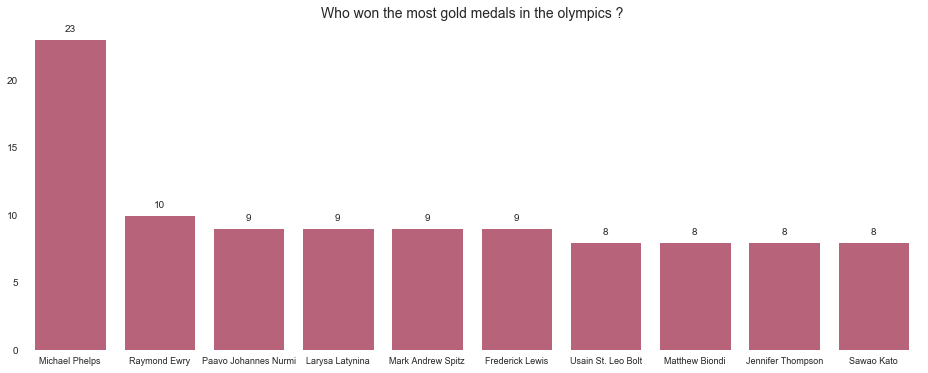

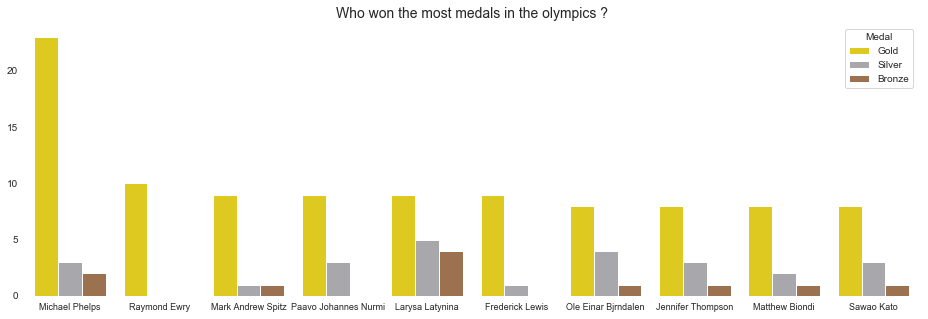

In [59]:
plt.figure(figsize=(16,6))
ax1 = sns.barplot(x='Name',y='Medal',data=medals,palette=['#c55572'])
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True);
plt.xlabel('');
plt.ylabel('');
plt.xticks(wrap=True,fontsize=9)
plt.title('Who won the most gold medals in the olympics ?',fontsize=14,y=1.00);
plt.figure(figsize=(16,5))
ax1 = sns.barplot(x='Name',y='Sport',data=all_medals0.dropna(),palette=['#FEE101','#A7A7AD','#A77044'],hue='Medal')
sns.despine(left=True, bottom=True);
plt.xticks(wrap=True,fontsize=9)
plt.xlabel('');
plt.ylabel('');
plt.title('Who won the most medals in the olympics ?',fontsize=14,y=1.00);

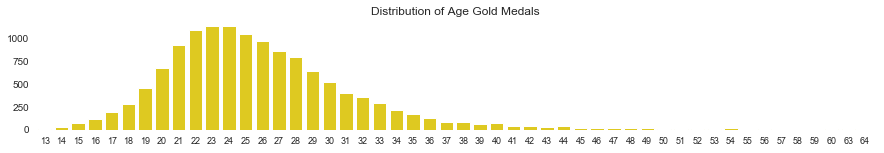

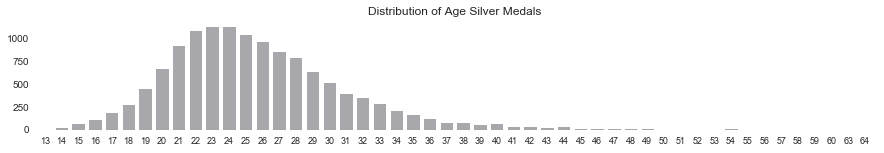

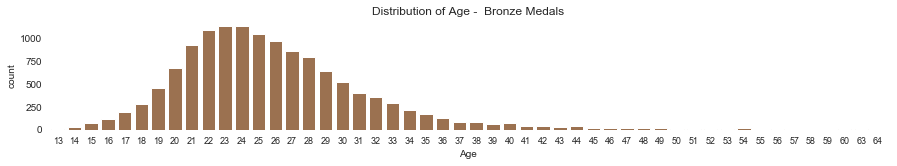

In [60]:
goldMedals, silverMedals, bronzeMedals = data[(data.Medal == 'Gold')],data[(data.Medal == 'Silver')],data[(data.Medal == 'Bronze')]
plt.figure(figsize=(15, 2))
sns.countplot(goldMedals['Age'].dropna().astype(int),palette=['#FEE101'])
plt.title('Distribution of Age Gold Medals');
sns.despine(left=True, bottom=True);
plt.xticks(wrap=True,fontsize=9)
plt.xlabel('');
plt.ylabel('');
plt.figure(figsize=(15, 2))
sns.countplot(goldMedals['Age'].dropna().astype(int),palette=['#A7A7AD'])
plt.title('Distribution of Age Silver Medals');
sns.despine(left=True, bottom=True);
plt.xticks(wrap=True,fontsize=9)
plt.xlabel('');
plt.ylabel('');
plt.figure(figsize=(15, 2))
sns.countplot(goldMedals['Age'].dropna().astype(int),palette=['#A77044'])
plt.title('Distribution of Age -  Bronze Medals');
sns.despine(left=True, bottom=True);
plt.xticks(wrap=True,fontsize=9);


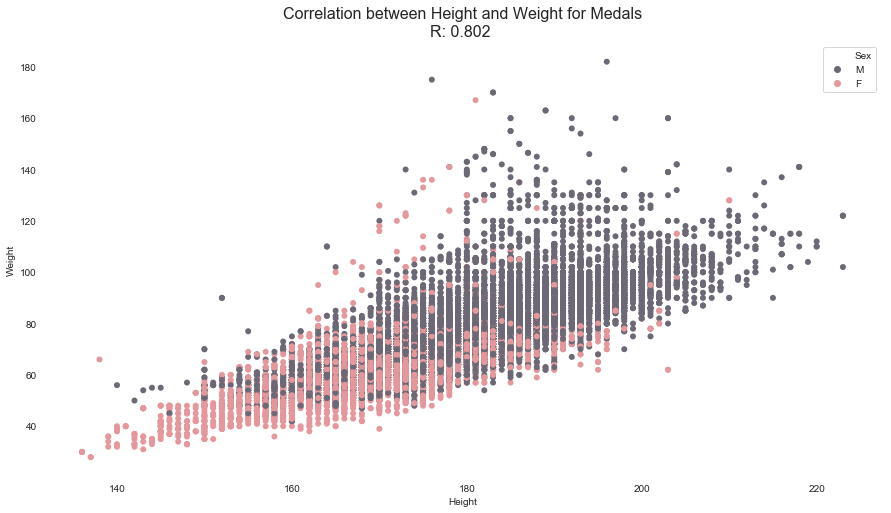

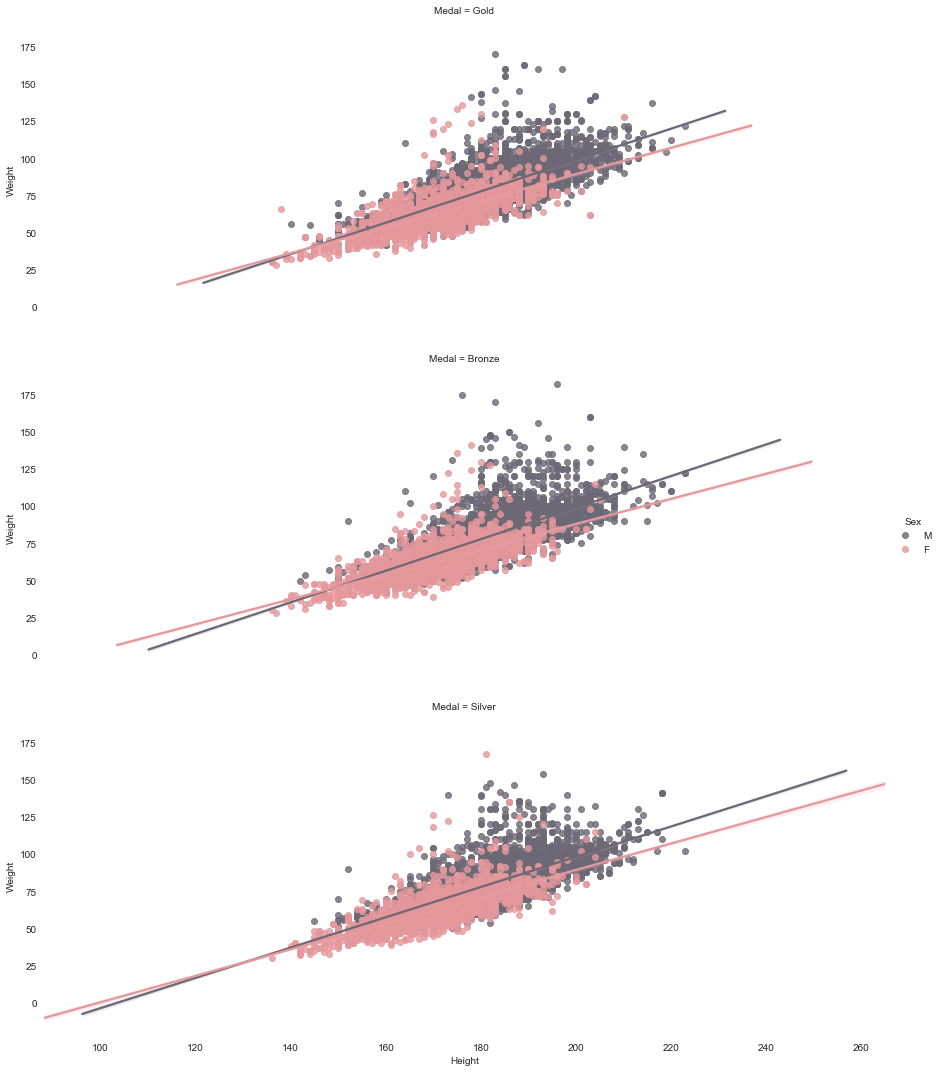

In [61]:
corr_1 = data[(data['Medal']=='Gold') | (data['Medal']=='Silver') | (data['Medal']=='Bronze')].corr()['Weight']['Height']
f,ax = plt.subplots(figsize=(15,8))
a1 = sns.scatterplot(x="Height", y="Weight",           
                palette=['#6D6875','#E5989B'],hue='Sex',
                sizes=(122, 200), linewidth=0,
                data=data[(data['Medal']=='Gold') | (data['Medal']=='Silver') | (data['Medal']=='Bronze')])
a1.set_title(f'Correlation between Height and Weight for Medals\nR: {round(corr_1,3)} ',fontsize=16)
sns.despine(left=True, bottom=True);
sns.lmplot(x="Height", y="Weight", row="Medal",
           data=data,hue='Sex',height=5,aspect=2.5,palette=['#6D6875','#E5989B']);
sns.despine(left=True, bottom=True);

In [62]:
#data2 = pd.concat([data, pd.get_dummies(data['Medal'])], axis=1)

In [63]:
data0 = data.groupby(['Age','Height','Weight','Medal'])['Name'].count().reset_index().rename(columns={'Name':'Medals'})

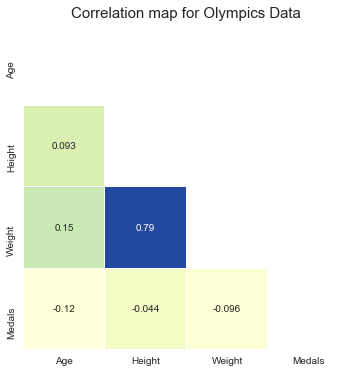

In [64]:
f,ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(data0.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data0.corr(),cmap='YlGnBu',annot=True,linewidths=.1,square=True,mask=mask,cbar=False);
plt.title('Correlation map for Olympics Data',fontsize=15);

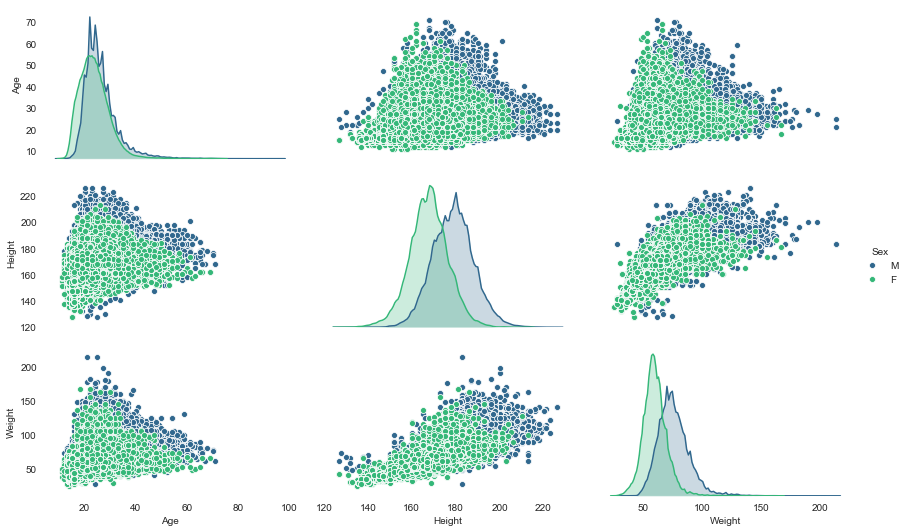

In [65]:
sns.pairplot(data[['Age','Height','Weight','Medal','Sex','region']],
             hue='Sex',palette='viridis',aspect=1.6);
sns.despine(left=True, bottom=True);